In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df= pd.read_csv('Mall_Customers.csv')
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


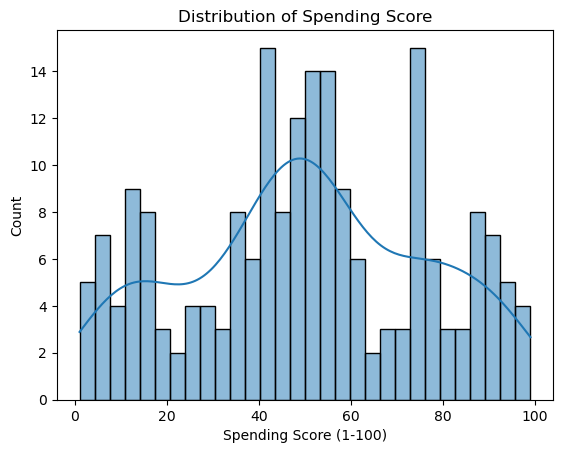

In [4]:
sns.histplot(df['Spending Score (1-100)'],bins=30, kde=True)
plt.title('Distribution of Spending Score')
plt.show()

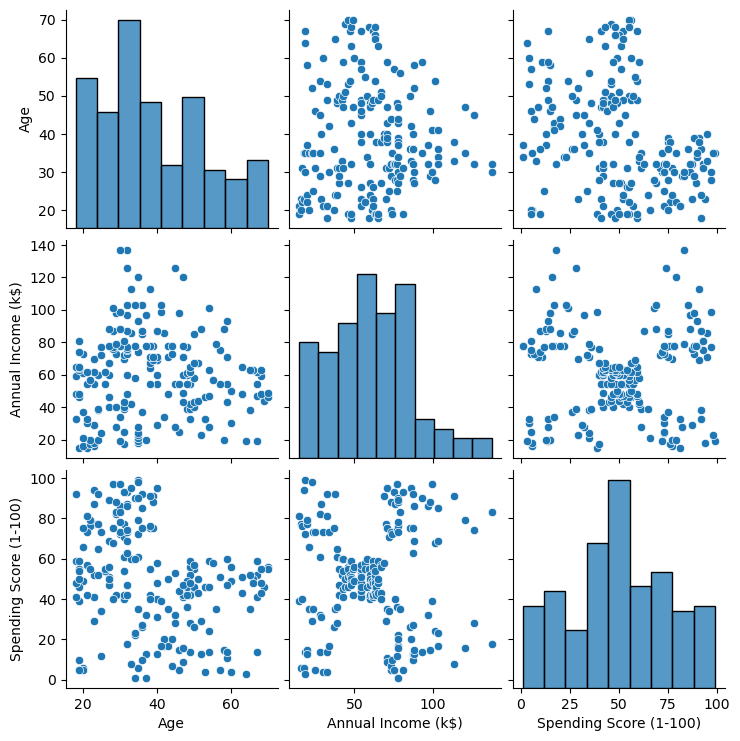

In [5]:
sns.pairplot(df[['Age','Annual Income (k$)','Spending Score (1-100)']])
plt.show()

In [6]:
x= df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

print(x.shape)

(200, 2)


# Elbow Method

C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

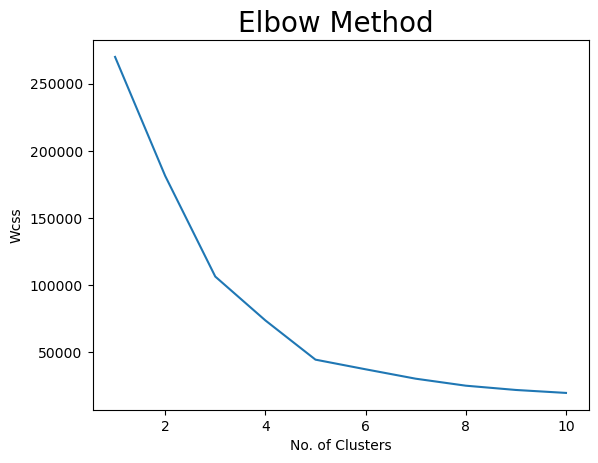

In [7]:
wcss= []
for i in range (1,11):
    km= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method ',fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()

# KMeans Clustering Algorithm

C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


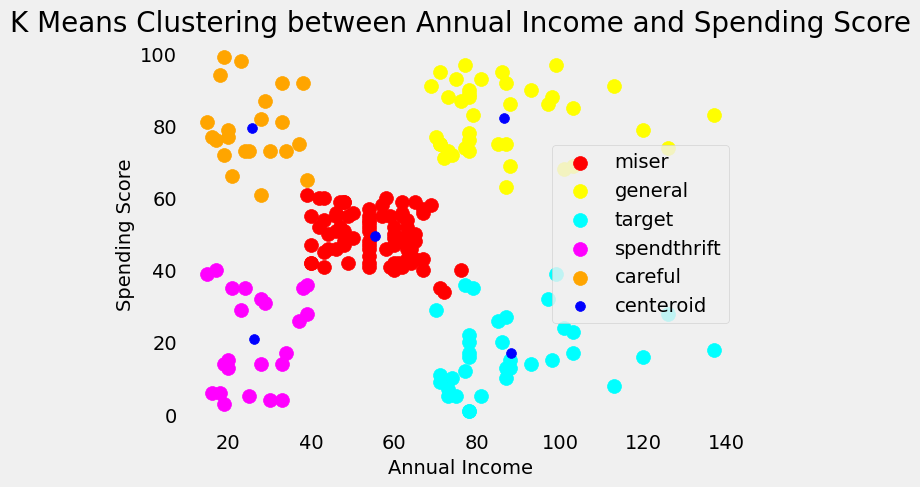

In [8]:
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


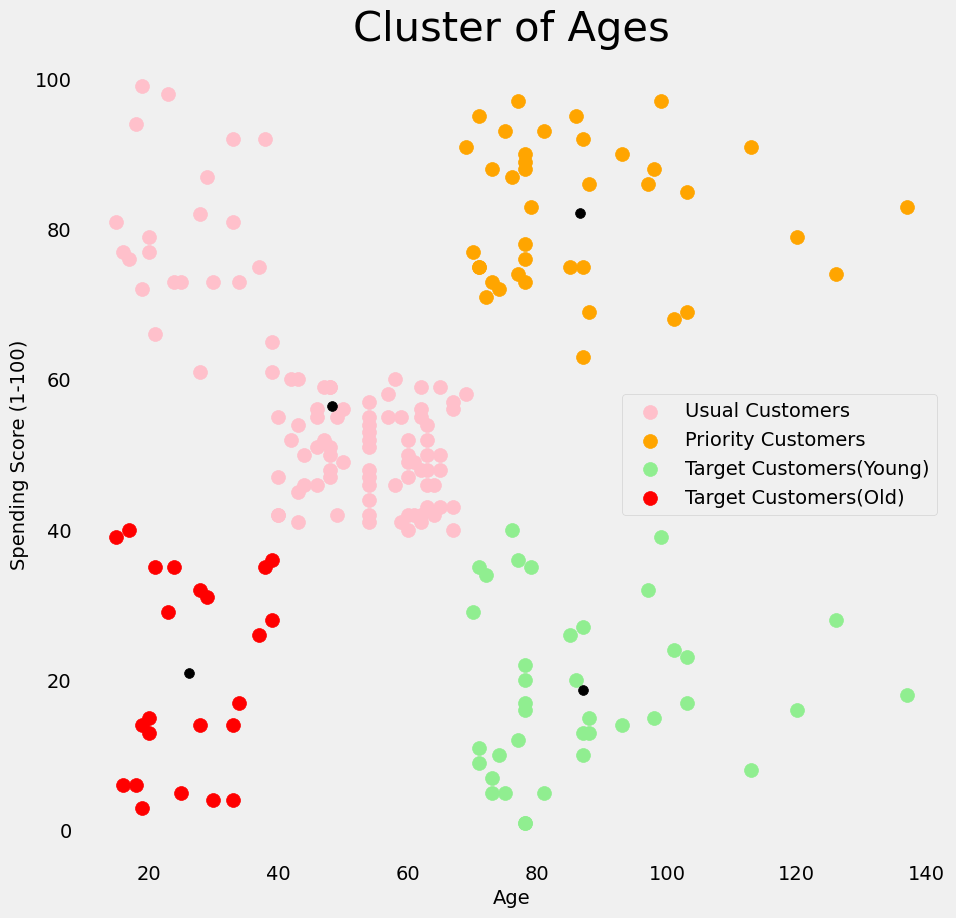

In [9]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

# Silhouette Score

In [10]:
score= silhouette_score(x, km.labels_, metric='euclidean')
print('Silhouette Score: %.3f'% score)

Silhouette Score: 0.554


# Silhouette Visualizer (YellowBrick Package)

In [11]:
from yellowbrick.cluster import SilhouetteVisualizer

C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

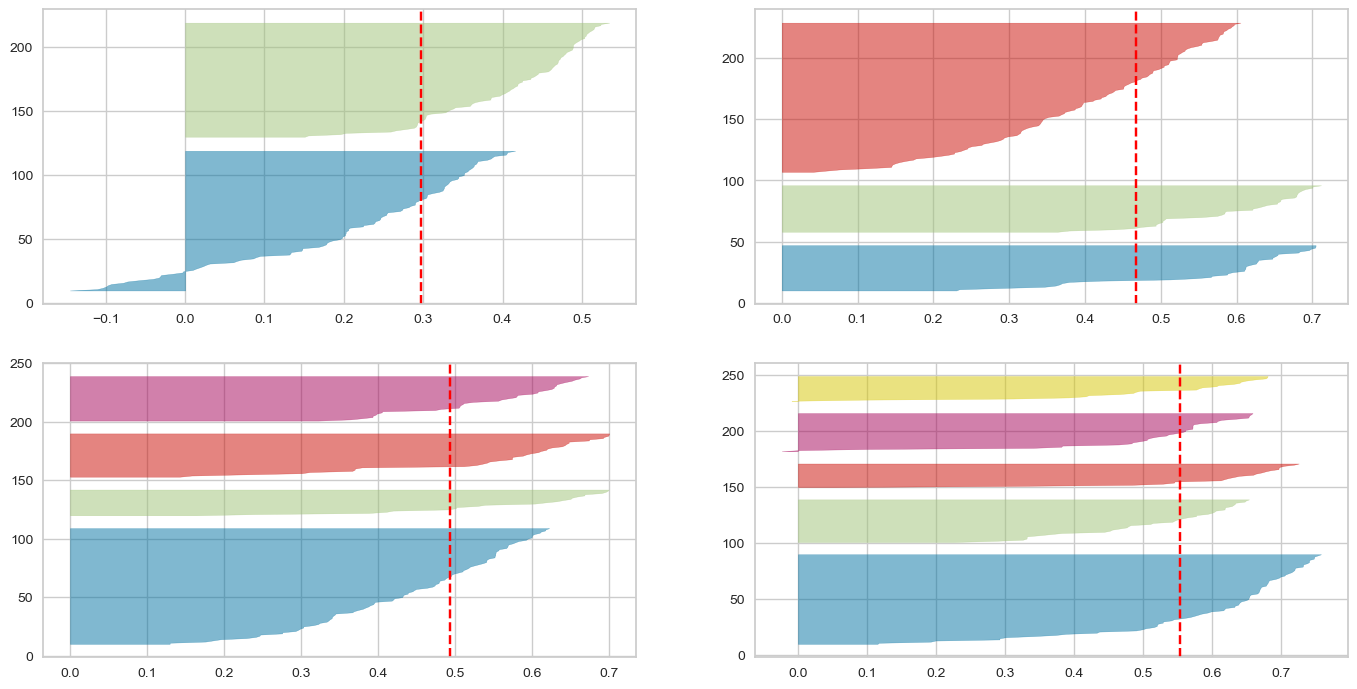

In [12]:
fig,ax= plt.subplots(2,2, figsize=(15,8))
for i in [2,3,4,5]:
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 42)
    q,mod = divmod(i,2)
    
    visualizer= SilhouetteVisualizer(km, colors= 'yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x)

# Clustering Multiple Dimensions/Features (3 is Max for Visualization)

In [13]:
a= df.loc[:,['Age','Annual Income (k$)','Spending Score (1-100)']].values

print(a.shape)

(200, 3)


C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there a

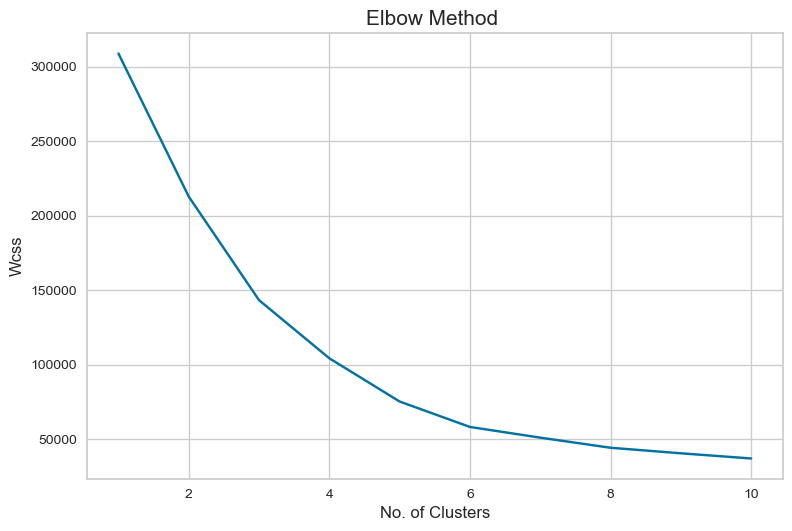

In [14]:
wcss= []
for i in range (1,11):
    km= KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(a)
    wcss.append(km.inertia_)

plt.plot(range(1,11),wcss)
plt.title('Elbow Method ',fontsize=15)
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()

In [15]:
km = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(a)

C:\Anaconda_Python\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualization

In [16]:
y_means = pd.DataFrame(y_means)
df1 = pd.concat([df,y_means], axis=1)
df1 = df1.rename(columns={0:'Clusters'})
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,5
2,3,Female,20,16,6,4
3,4,Female,23,16,77,5
4,5,Female,31,17,40,4


In [17]:
print('Customer IDs for Cluster 1: ', df1[df1['Clusters']==0]['CustomerID'].values)
print('\nCustomer IDs for Cluster 2: ', df1[df1['Clusters']==1]['CustomerID'].values)
print('\nCustomer IDs for Cluster 3: ', df1[df1['Clusters']==2]['CustomerID'].values)
print('\nCustomer IDs for Cluster 4: ', df1[df1['Clusters']==3]['CustomerID'].values)
print('\nCustomer IDs for Cluster 5: ', df1[df1['Clusters']==4]['CustomerID'].values)
print('\nCustomer IDs for Cluster 6: ', df1[df1['Clusters']==5]['CustomerID'].values)

Customer IDs for Cluster 1:  [ 44  48  49  50  52  53  59  62  66  69  70  76  78  79  82  85  88  89
  92  94  95  96  98 100 101 104 106 112 113 114 115 116 121 122 123 125
 133 143]

Customer IDs for Cluster 2:  [127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163 165
 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Customer IDs for Cluster 3:  [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Customer IDs for Cluster 4:  [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]

Customer IDs for Cluster 5:  [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 45]

Customer IDs for Cluster 6:  [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
